In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import students_distance as sd
palette1 = sns.color_palette("tab10", 2)

# `STUDENTS` Dataset

This document describes the dataset `STUDENTS`. It includes 348 rankings, each provided by a different student of the course 'Ecomomics and Enterprise' in Tecnun University. Each ranking sorts 4 words in order of similarity to the word `amortization`. The words are: `depreciation`, `expense`, `lifetime`, `payment`. There exists a real ground-true ranking, which is denoted along the experiment as `true_ranking` = [0,1,2,3]. 

Each row in the file `students.csv` correspods to one student. The columns `i0` to `i3` give the **ranking** corresponding to the items `depreciation`, `expense`, `lifetime`, `payment` respectively.

There are two cohorts in this dataset:

- cohort 1: the experiment is carried out **before** the class, 
- cohort 2: the experiment is carried out **after** the class.

This work is licensed under a CC BY 4.0 license. 

## Loading the data
The following lines show how to load the data and plot an histogram of the distances to the `true_ranking`

The first 3 rankings are
[[3 2 0 1]
 [2 3 0 1]
 [0 3 1 2]]


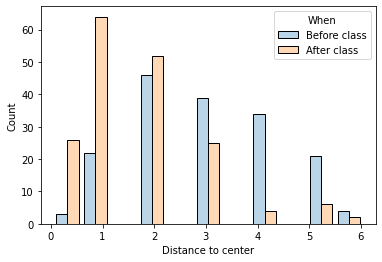

In [2]:
dfstu = pd.read_csv('./students.csv')
rankings = dfstu[['i0', 'i1', 'i2', 'i3']].values
n, true_ranking = 4,[0,1,2,3]
ax = sns.histplot(data=dfstu, x="Distance to center", hue="When", multiple="dodge", 
             shrink=.8, alpha=0.3,palette=palette1)
print("The first 3 rankings are")
print(rankings[:3,:])

# Improvement after class

Did the students' answers improve by taking the class? The most direct approach is to measure 

- the distance between the average ranking of the student **before** the class and the `true_ranking` and
- the distance between the average ranking of the student **after** the class and the `true_ranking`.

The average ranking before the class was further than the average distance after the class. Therefore, we can conclude that the students did learn in the class. 


In [3]:
r_bef = dfstu[dfstu.When=='Before class'][['i0', 'i1', 'i2', 'i3']].values
r_aft = dfstu[dfstu.When=='After class'][['i0', 'i1', 'i2', 'i3']].values
median_bef = np.argsort(np.argsort(r_bef.sum(axis=0)))
median_aft = np.argsort(np.argsort(r_aft.sum(axis=0)))
print("The distance of the average ranking before the class is", sd.distance(true_ranking,median_bef))
print("The distance of the average ranking before the class is", sd.distance(true_ranking,median_aft))
print("Did the students learn?", sd.distance(true_ranking,median_bef) > sd.distance(true_ranking,median_aft))


The distance of the average ranking before the class is 2
The distance of the average ranking before the class is 1
Did the students learn? True
